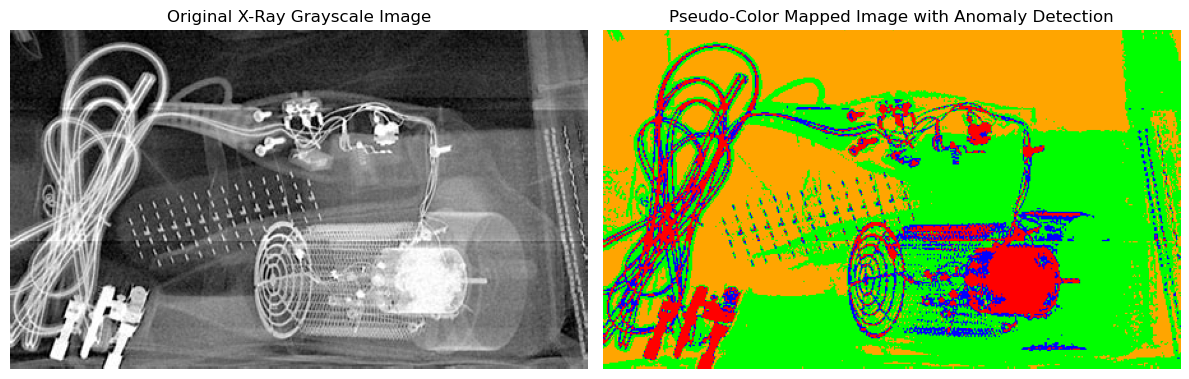

In [3]:
"""
**Theoretical Background: X-Ray Image Processing and Pseudo-Coloring**

**Objective:**
This program simulates material detection in X-ray images by applying pseudo-coloring techniques to highlight specific intensity ranges corresponding to different materials. It also flags potential anomalies, such as explosives, based on pre-defined intensity thresholds.

**Concepts:**
1. **Intensity in X-Ray Images:**
   - X-ray images are typically represented as grayscale images, where pixel intensity indicates the material's density and attenuation properties.
   - Low-intensity values correspond to materials that allow more X-rays to pass through (e.g., organic materials like food).
   - High-intensity values represent denser materials that block more X-rays (e.g., metals).
   - Anomalous intensity ranges can indicate suspicious or dangerous materials, such as explosives.

2. **Pseudo-Coloring:**
   - Pseudo-coloring assigns specific colors to intensity ranges in grayscale images to improve visualization and interpretation.
   - It helps differentiate materials by mapping pixel intensity values to a color scheme.
   - In this program:
     - **Orange:** Represents low-density organic materials (e.g., food, paper).
     - **Green:** Represents medium-density materials (e.g., plastics, liquids).
     - **Blue:** Represents high-density materials (e.g., metals).
     - **Red:** Highlights anomalous regions (simulated for explosives or flagged items).

3. **Thresholding for Material Detection:**
   - Threshold values are defined to segment the intensity range into categories:
     - **Low Intensity (<85):** Organic materials.
     - **Medium Intensity (85-170):** Mixed-density materials.
     - **High Intensity (>170):** Dense materials.
     - **Anomalies (200-255):** Simulated range for explosives.

4. **Practical Use in Airport Security:**
   - Airport X-ray machines use similar principles to detect potential threats in luggage.
   - Materials with specific density patterns are flagged for further inspection.
   - While this program simplifies the process, real-world systems rely on advanced algorithms and machine learning to classify objects.

**Implementation Details:**
1. Load the grayscale X-ray image to simulate raw X-ray data.
2. Define pseudo-coloring ranges and apply them dynamically to each pixel.
3. Generate a pseudo-colored image where different materials are highlighted with distinct colors.
4. Visualize the original grayscale image alongside the pseudo-colored output for comparison.

**Note:**
This simulation is for educational purposes and is not intended for actual security applications. Real X-ray machines use more sophisticated technologies, including dual-energy imaging and deep learning algorithms, to detect threats with high accuracy.

"""

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **Enhanced Program Description:**
# This program simulates the process of detecting materials in an X-ray image using intensity values.
# It highlights specific materials (organic, mixed, dense) and provides a threshold for detecting anomalies (e.g., potential explosives).

# Load an example grayscale image to simulate X-ray data
image_path = os.path.join(os.getcwd(), 'data', 'images', 'x_ray_explosive.jpeg')
xray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Ensure the image is loaded successfully
if xray_image is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

# Step 1: Define pseudo-coloring ranges for material detection
# Low intensity: organic materials -> Orange
# Medium intensity: mixed density -> Green
# High intensity: dense materials -> Blue
# Anomaly threshold: Explosives (simulated as specific high intensity range) -> Red

# Create an empty RGB image for pseudo-coloring
pseudo_color_image = np.zeros((xray_image.shape[0], xray_image.shape[1], 3), dtype=np.uint8)

# Define thresholds
low_threshold = 85
high_threshold = 170
anomaly_min = 200  # Simulated range for explosives
anomaly_max = 255

# Apply pseudo-colors dynamically
for i in range(xray_image.shape[0]):
    for j in range(xray_image.shape[1]):
        intensity = xray_image[i, j]
        if intensity < low_threshold:  # Low intensity (organic materials)
            pseudo_color_image[i, j] = [255, 165, 0]  # Orange
        elif low_threshold <= intensity <= high_threshold:  # Medium intensity (mixed materials)
            pseudo_color_image[i, j] = [0, 255, 0]  # Green
        elif anomaly_min <= intensity <= anomaly_max:  # Specific high-intensity range (e.g., explosives)
            pseudo_color_image[i, j] = [255, 0, 0]  # Red
        else:  # High intensity (dense materials)
            pseudo_color_image[i, j] = [0, 0, 255]  # Blue

# Step 2: Visualization
plt.figure(figsize=(12, 8))

# Original Grayscale "X-Ray" Image
plt.subplot(1, 2, 1)
plt.imshow(xray_image, cmap='gray')
plt.title("Original X-Ray Grayscale Image")
plt.axis("off")

# Pseudo-Color Mapped Image
plt.subplot(1, 2, 2)
plt.imshow(pseudo_color_image)
plt.title("Pseudo-Color Mapped Image with Anomaly Detection")
plt.axis("off")

plt.tight_layout()
plt.show()
